In [ ]:
import tensorflow as tf
import keras
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.3.0
Is using GPU? False


In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
train_labels = train_labels.reshape(50000,)

In [ ]:
train_labels.shape

(50000,)

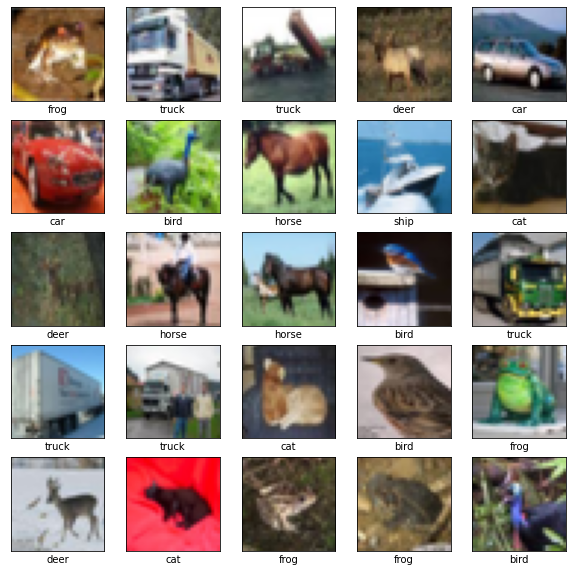

In [ ]:
class_names = ['aeroplane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(train_images[i], cmap=plt.cm.brg)
  plt.xlabel(class_names[train_labels[i]])
  plt.xticks([])
  plt.yticks([])
plt.show()


In [ ]:
train_images = train_images / 255.
test_images = test_images / 255.

In [80]:
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.layers import Dropout, Flatten, Input, Dense

def create_model():
  model = keras.Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  return model

model = create_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_11 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)              

In [82]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=10)

Epoch 1/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.5422 - accuracy: 0.4372 - val_loss: 1.2843 - val_accuracy: 0.5378
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1693 - accuracy: 0.5850 - val_loss: 1.0867 - val_accuracy: 0.6144
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0114 - accuracy: 0.6444 - val_loss: 1.0176 - val_accuracy: 0.6471
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9196 - accuracy: 0.6792 - val_loss: 0.9759 - val_accuracy: 0.6650
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8437 - accuracy: 0.7050 - val_loss: 0.8904 - val_accuracy: 0.6965
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7853 - accuracy: 0.7252 - val_loss: 0.8715 - val_accuracy: 0.7015
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7352 - accuracy: 0.7427 - val_loss: 0.8575 -

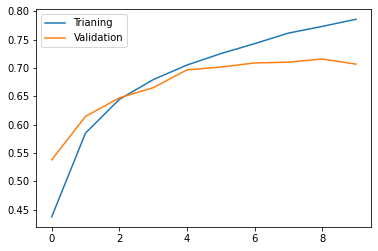

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(len(acc)), acc, label='Trianing')
plt.plot(range(len(acc)), val_acc, label='Validation')
plt.legend()
plt.show()